In [19]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
# from datetime import datetime, timedelta
# import warnings

In [20]:
# 1 Understanding the data
df_Wine=pd.read_csv('winequality-red.csv')
df_Wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,taste_category,price_range,taste_value,color_category,color_value
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Sour,Low,1,Medium,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Sour,Low,1,Light,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Sour,Low,1,Light,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Sour,Low,1,Light,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Sour,Low,1,Medium,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Sour,Low,1,Medium,2
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Sour,Low,1,Medium,2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Sour,Low,1,Medium,2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Sour,Low,1,Medium,2


In [21]:
df_Wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,taste_value,color_value
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,1.117573,1.384615
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.342902,0.489221
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,1.000000,1.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,1.000000,1.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,1.000000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,1.000000,2.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,3.000000,3.000000


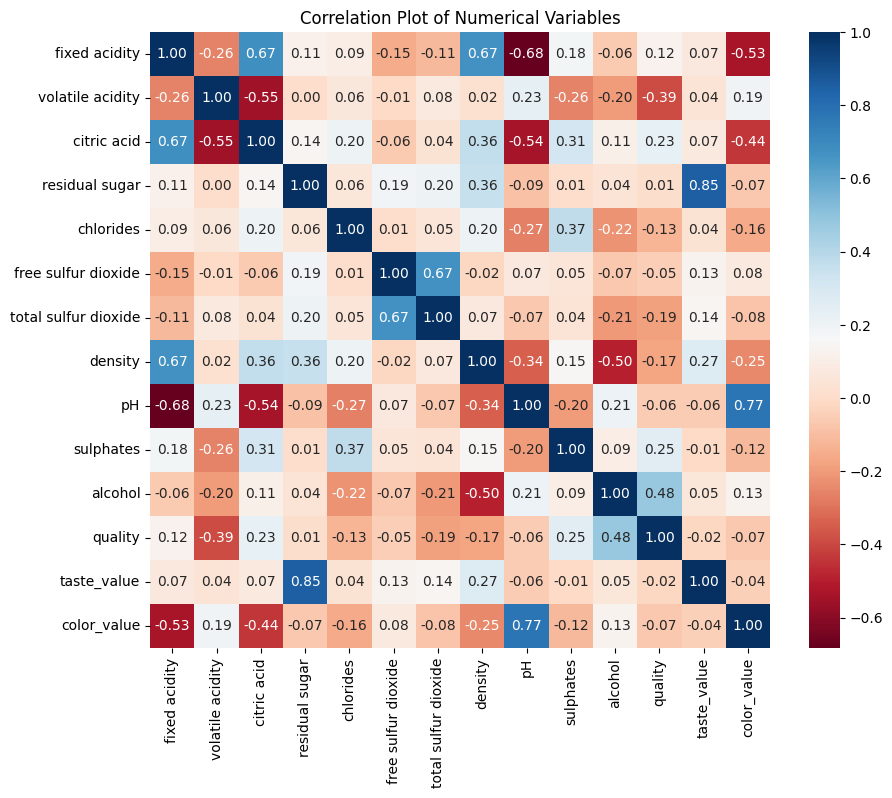

In [22]:
# Heatmap
# correlation
# To understand the relation between each columns
numerical_columns = df_Wine.select_dtypes(include=['int64', 'float64'])

# Calculating the correlation matrix
correlation_matrix = numerical_columns.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', fmt=".2f")
plt.title('Correlation Plot of Numerical Variables')
plt.show()

In [23]:

x = df_Wine.drop([ 'quality','taste_category','color_category','price_range'],axis=1)  # Double square brackets for multiple columns
y = df_Wine['color_value']  # Single square bracket for a single column


In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# # Instantiate the Gradient Boosting Classifier with specified parameters
# gbc = GradientBoostingClassifier()

# # Train the model
# gbc.fit(X_train, y_train)

# # Make predictions on the testing set
# y_pred = gbc.predict(X_test)

# # Calculate the training and testing accuracies
# training_accuracy = gbc.score(X_train, y_train)
# testing_accuracy = accuracy_score(y_test, y_pred)

# print("Training Accuracy:", training_accuracy)
# print("Testing Accuracy:", testing_accuracy)

# # Additional metrics for detailed evaluation
# class_report = classification_report(y_test, y_pred)
# confusion_mat = confusion_matrix(y_test, y_pred)

# print("Classification Report:\n", class_report)
# print("Confusion Matrix:\n", confusion_mat)

# # Plot the confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
# plt.title('Confusion Matrix (Gradient Boosting Classifier)')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the data
rf.fit(X_train, y_train)  # Replace with your training data and target variable

# Get the feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to display the feature importances
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='importance', ascending=False)

print("Feature Importances:")
print(importance_df)


Feature Importances:
                 feature  importance
8                     pH    0.472382
12           color_value    0.359301
0          fixed acidity    0.081883
2            citric acid    0.042494
7                density    0.010050
4              chlorides    0.007998
1       volatile acidity    0.006337
10               alcohol    0.005599
6   total sulfur dioxide    0.005591
5    free sulfur dioxide    0.003263
9              sulphates    0.002498
3         residual sugar    0.002426
11           taste_value    0.000178


In [26]:

x1 = df_Wine[['pH','citric acid','fixed acidity']]  # Double square brackets for multiple columns
y1 = df_Wine['color_value']  # Single square bracket for a single column


Training Accuracy: 1.0
Testing Accuracy: 0.996875
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       196
           2       0.99      1.00      1.00       123
           3       0.00      0.00      0.00         1

    accuracy                           1.00       320
   macro avg       0.66      0.67      0.67       320
weighted avg       0.99      1.00      1.00       320

Confusion Matrix:
 [[196   0   0]
 [  0 123   0]
 [  0   1   0]]


c:\End to end Wine quality\Wine_Quality\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\End to end Wine quality\Wine_Quality\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\End to end Wine quality\Wine_Quality\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

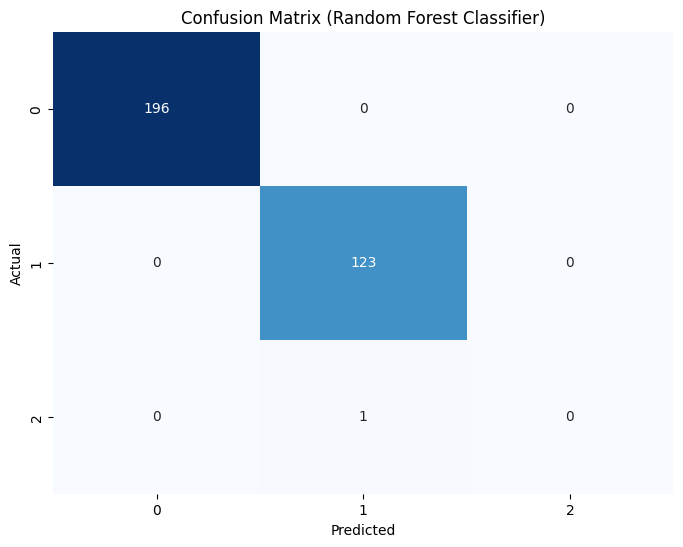

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

scaler = StandardScaler()
x1 = scaler.fit_transform(x1)


# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

# Instantiate the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust parameters

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf.predict(X_test)

# Calculate the training and testing accuracies
training_accuracy = rf.score(X_train, y_train)
testing_accuracy = accuracy_score(y_test, y_pred)

print("Training Accuracy:", training_accuracy)
print("Testing Accuracy:", testing_accuracy)

# Additional metrics for detailed evaluation
class_report = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", confusion_mat)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Random Forest Classifier)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [28]:
import pickle5 as pickle 
pickle.dump(scaler,open('color_scalling.pkl','wb'))

In [29]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.svm import SVC
# from sklearn.neural_network import MLPClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.gaussian_process import GaussianProcessClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import RidgeClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.preprocessing import StandardScaler

# # Split the data into training and testing sets (80% training, 20% testing)
# X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

# # Dictionary to store model names and their instances
# models = {
#     "Random Forest Classifier": RandomForestClassifier(),
#     "Gradient Boosting Classifier": GradientBoostingClassifier(),
#     "Support Vector Classifier": SVC(),
#     "Neural Network Classifier": MLPClassifier(),
#     "Logistic Regression": LogisticRegression(),
#     "Gaussian Process Classifier": GaussianProcessClassifier(),
#     "K-Nearest Neighbors Classifier": KNeighborsClassifier(),
#     "Decision Tree Classifier": DecisionTreeClassifier(),
#     "Ridge Classifier": RidgeClassifier(),
# }

# # Dictionary to store model performance metrics
# metrics = {}

# # Train and evaluate each model
# for name, model in models.items():
#     # Train the model
#     model.fit(X_train, y_train)
    
#     # Make predictions on the training and testing sets
#     y_train_pred = model.predict(X_train)
#     y_test_pred = model.predict(X_test)
    
#     # Calculate evaluation metrics for training and testing sets
#     training_accuracy = accuracy_score(y_train, y_train_pred)
#     testing_accuracy = accuracy_score(y_test, y_test_pred)
#     class_report = classification_report(y_test, y_test_pred)
#     confusion_mat = confusion_matrix(y_test, y_test_pred)
    
#     # Store metrics in the dictionary
#     metrics[name] = {
#         'Training Accuracy': training_accuracy,
#         'Testing Accuracy': testing_accuracy,
#         'Classification Report': class_report,
#         'Confusion Matrix': confusion_mat
#     }

# # Print the evaluation metrics for each model
# for name, metric in metrics.items():
#     print(f"Model: {name}")
#     print(f"Training Accuracy: {metric['Training Accuracy']}")
#     print(f"Testing Accuracy: {metric['Testing Accuracy']}")
#     print(f"Classification Report:\n{metric['Classification Report']}")
#     print(f"Confusion Matrix:\n{metric['Confusion Matrix']}")
#     print()

# # Plot confusion matrices for each model
# for name, metric in metrics.items():
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(metric['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', cbar=False)
#     plt.title(f'Confusion Matrix ({name})')
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.show()
#     warnings.filterwarnings("ignore")


In [30]:
pred = rf.predict(X_test)

In [31]:
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
df_predict.head(10)

,Actual,Predicted
803,1,1
124,2,2
350,1,1
682,1,1
1326,2,2
976,2,2
1493,1,1
706,2,2
613,1,1
1587,2,2


In [32]:
# # Function to get user input and predict taste category
# def predict_color_category():
#     citric_acid = float(input("Enter citric acid content: "))
#     pH = float(input("Enter pH content: "))
#     fixed_acidity = float(input("Enter fixed_acidity in wine: "))
#     user_data = scaler.transform([[pH, fixed_acidity, citric_acid]])  # Standardize user input
#     predicted_category = rf.predict(user_data)
#     print("Predicted color Category:", predicted_category[0])

# # Predict taste category for user input
# predict_color_category()

In [33]:
# Color dictionary mapping category numbers to RGB values
color_dict = {
    1: (102, 0, 0),  # Pinotage: Deep red
    2: (153, 0, 51),  # Mencía: Ruby red
    3: (204, 102, 102)  # Schiava: Light ruby red
}


Predicted Color Category: 2


c:\End to end Wine quality\Wine_Quality\venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


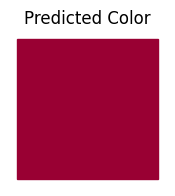

In [34]:
# Function to get user input and predict color category
def predict_color_category2():
    citric_acid = float(input("Enter citric acid content: "))
    pH = float(input("Enter pH content: "))
    fixed_acidity = float(input("Enter fixed_acidity in wine: "))
    user_data = scaler.transform([[pH, fixed_acidity, citric_acid]])  # Standardize user input
    predicted_category = rf.predict(user_data)
    predicted_color = color_dict[predicted_category[0]]  # Get the RGB values from the color dictionary

    # Display the predicted category
    print("Predicted Color Category:", predicted_category[0])

    # Display the corresponding color
    predicted_color_normalized = tuple(val / 255 for val in predicted_color)  # Normalize RGB values to range [0, 1]

    import matplotlib.pyplot as plt
    plt.figure(figsize=(2, 2))
    plt.fill([0, 1, 1, 0], [0, 0, 1, 1], color=predicted_color_normalized)  # Fill a square with the predicted color
    plt.axis('off')
    plt.title("Predicted Color")  # Add a title to the plot
    plt.show()
# Predict color category for user input
predict_color_category2()


# Pickling the model file for deployment

In [35]:
import pickle5 as pickle

In [36]:
pickle.dump(rf,open('color.pkl','wb'))
pickled_model_color=pickle.load(open('color.pkl','rb'))
##Prediction
pickled_model_color.predict(X_test)

array([1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2,
       1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2,
       1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2,
       2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2,
       1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,